In [1]:
Project = '/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Projects/Adipocyte'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

plt.rcParams.update(plt.rcParamsDefault)

mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

plt.rcParams['ps.useafm']=True
plt.rcParams['pdf.fonttype']=42

plt.rc('font', size=7)          # controls default text sizes
plt.rc('axes', titlesize=7)     # fontsize of the axes title
plt.rc('axes', labelsize=7)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=6)    # fontsize of the tick labels
plt.rc('ytick', labelsize=6)    # fontsize of the tick labels
plt.rc('legend', fontsize=6)    # legend fontsize
suptitlesize = 8

plt.rc('axes', axisbelow=True) #push axes to back
mpl.rcParams['axes.linewidth'] = 0.5

In [2]:
# Loading data tables
data_dict = {}

data_dict['RNA'] = pd.read_csv(f'{Project}/Results/Tables/CPM_RD_calculation/v20221217/adi_RNA_Ncount.tsv', sep='\t')
data_dict['RNA'] = data_dict['RNA'].drop(columns='gene_name').set_index('gene_id')

data_dict['RPF'] = pd.read_csv(f'{Project}/Results/Tables/CPM_RD_calculation/v20221217/adi_RPF_Ncount.tsv', sep='\t')
data_dict['RPF'] = data_dict['RPF'].drop(columns='gene_name').set_index('gene_id')

data_dict['PT'] = pd.read_csv(f'{Project}/Results/Tables/Proteome/PT_Norm_FC_calculation/v20240403/adi_PT_Ncount.tsv', sep='\t')
data_dict['PT'] = data_dict['PT'].set_index('uniprot_id')

In [3]:
name = {'RNA' : 'Transcriptome\n(RNA-seq)',
        'RPF' : 'Translatome\n(Ribo-seq)',
        'PT'  : 'Proteome\n(MS)'}

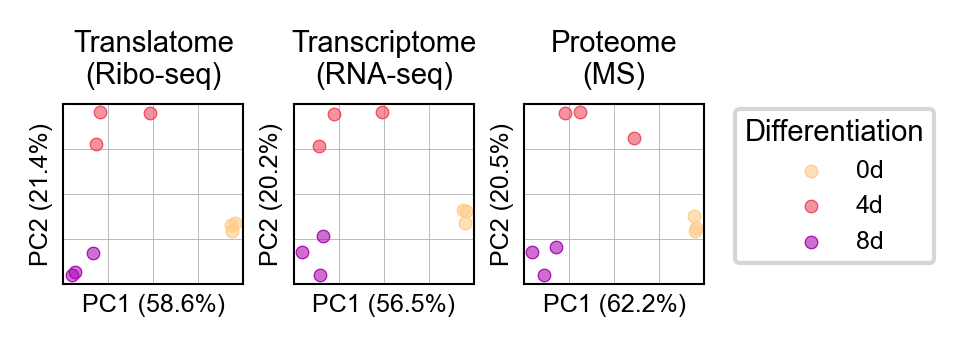

<Figure size 640x480 with 0 Axes>

In [17]:
sF = 0.6 # Size factor
wgap = 0.28
hgap = 0.38
nrow, ncol = 1, 3

fs_w = ncol*sF + (ncol-1)*wgap*sF
fs_h = nrow*sF + (nrow-1)*hgap*sF

fig = plt.figure(figsize=( fs_w, fs_h ), dpi=300)
grid = plt.GridSpec(nrow, ncol,
                    left=0, right=1, bottom=0, top=1,
                    wspace=wgap, hspace=hgap)

for D_tp,row,col in zip(data_dict,[0,0,0],[1,0,2]):
    # PCA
    std_data = StandardScaler().fit_transform(data_dict[D_tp].T)
    pca = PCA(n_components=2)
    PCs = pca.fit_transform(std_data)
    PCA_df = pd.DataFrame(data=PCs, columns = ['PC1', 'PC2'])
    pc1_r, pc2_r = pca.explained_variance_ratio_
    
    # Plotting
    ax = fig.add_subplot(grid[row,col])
    
    labels = ['0d','4d','8d']
    rep_num = 3
    
    fcolors = ['#FFCC8899','#ED4A5E99','#AA0DB499']
    colors = ['#FFCC88','#ED4A5E','#AA0DB4']
    for i in range(len(labels)):
        n = i*rep_num
        ax.scatter(PCA_df['PC1'][n:n+rep_num], PCA_df['PC2'][n:n+rep_num],
                   facecolor=fcolors[i], s=9,
                   linewidth=0.3, edgecolors=colors[i], 
                   label=labels[i])
        
    a, b = ax.get_xlim()
    gap = (b-a)/4
    ax.set_xticks([a+gap, a+2*gap, a+3*gap])
    ax.set_xticklabels([])
    a, b = ax.get_ylim()
    gap = (b-a)/4
    ax.set_yticks([a+gap, a+2*gap, a+3*gap])
    ax.set_yticklabels([])
    ax.tick_params(length=0)
    ax.grid('#AAAAAA', linestyle='-', lw=0.2)
    
    ax.set_title(name[D_tp], y=0.97)
    ax.set_xlabel(f'PC1 ({pc1_r*100:.1f}%)',labelpad=-1, fontsize=6)
    ax.set_ylabel(f'PC2 ({pc2_r*100:.1f}%)',labelpad=-1, fontsize=6)
    
    if D_tp == 'PT' : ax.legend(loc='upper left', bbox_to_anchor=(1.1,1.04), title='Differentiation')

plt.savefig('adi_RNA-RPF-PT_PCA_plot.pdf', bbox_inches='tight')
plt.show()
plt.clf()